In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter

import seaborn as sns

import numpy as np
import pandas as pd
data=pd.read_csv("/Users/olivey/Downloads/titanic/train.csv")

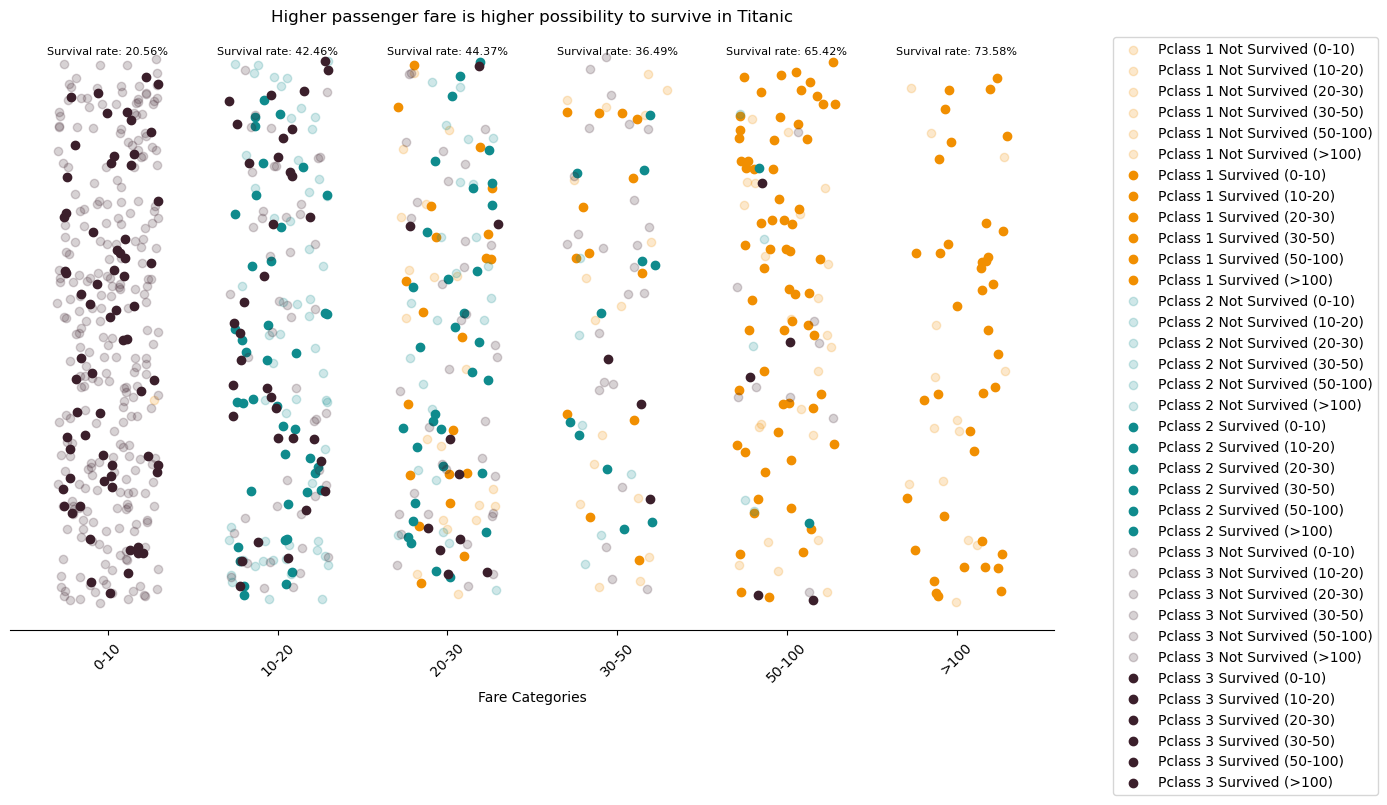

In [2]:
# Set the seed for reproducibility
np.random.seed(42)

# Define fare categories
fare_bins = [0, 10, 20, 30, 50, 100, np.inf]
fare_labels = ['0-10', '10-20', '20-30', '30-50', '50-100', '>100']
data['FareBin'] = pd.cut(data['Fare'], bins=fare_bins, labels=fare_labels)

# Calculate the number of categories for plotting
num_categories = len(fare_labels)

# Prepare the plotting data
plot_data = []

# We iterate over each class and survival status
for pclass in sorted(data['Pclass'].unique()):
    for survived in sorted(data['Survived'].unique()):
        for fare_bin in fare_labels:
            # Filter the data for this group
            subset = data[(data['Pclass'] == pclass) & 
                          (data['Survived'] == survived) & 
                          (data['FareBin'] == fare_bin)]
            
            # Calculate the y position for plotting
            y_values = np.random.uniform(low=0.1, high=0.9, size=len(subset))
            
            # Store the plotting data
            plot_data.append({
                'Pclass': pclass,
                'Survived': survived,
                'FareBin': fare_bin,
                'x': [fare_labels.index(fare_bin) + np.random.uniform(-0.3, 0.3) for _ in range(len(subset))],
                'y': y_values
            })

# Set color mapping for Pclass
color_map =  {1: '#f18f01', 2: '#0f8b8d', 3: '#3b1f2b'}

# Plot
fig, ax = plt.subplots(figsize=(14, 8))


survival_rates = []
for fare_bin in fare_labels:
    total_passengers = len(data[data['FareBin'] == fare_bin])
    survived_passengers = len(data[(data['FareBin'] == fare_bin) & (data['Survived'] == 1)])
    survival_rate = (survived_passengers / total_passengers) * 100 if total_passengers > 0 else 0
    survival_rates.append(survival_rate)# We iterate over each subset of data and plot it
for group_data in plot_data:
    ax.scatter(
        group_data['x'],
        group_data['y'],
        color=color_map[group_data['Pclass']],
        alpha=0.2 if group_data['Survived'] == 0 else 1,  # Set alpha to 0.2 for not survived
        label=f"Pclass {group_data['Pclass']} {'Survived' if group_data['Survived'] == 1 else 'Not Survived'} ({group_data['FareBin']})"
    )

# Annotate with survival rate percentages below the title
title_text = ax.title.get_text()
title_x, title_y = ax.title.get_position()
title_y_position = title_y - 0.1  # Adjust the position further below the title
for i, fare_bin in enumerate(fare_labels):
    ax.text(i, title_y_position, f'Survival rate: {survival_rates[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# Ticks and labels
ax.set_xticks(range(num_categories))
ax.set_xticklabels(fare_labels, rotation=45)
ax.set_yticks([])
ax.set_xlabel('Fare Categories')
ax.set_title('Higher passenger fare is higher possibility to survive in Titanic')

# Legend
handles, labels = ax.get_legend_handles_labels()
filtered_handles = []
filtered_labels = []
survived_labels = set()
for handle, label in zip(handles, labels):
    if label.startswith('Pclass') or label.startswith('Survived'):
        if label.startswith('Survived'):
            survived_labels.add(label.split('(')[0].strip())
        else:
            filtered_handles.append(handle)
            filtered_labels.append(label)

# Filter out duplicate Survived labels
for label in survived_labels:
    filtered_labels.append(label)
    filtered_handles.append(handles[labels.index(label)])

ax.legend(filtered_handles, filtered_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

